# Regresión Lineal


La regresión lineal intenta predecir una característica de resultado continuo (**Y**) a partir de una o más características explicativas (**X**).  

$$Y = \beta_0 + \beta_1 X$$

$\beta_0$ se denomina término de intercepción y representa el valor medio esperado de Y cuando todas las características explicativas son iguales a 0.
$\beta_1$ se denomina coeficiente beta y representa el cambio esperado en el valor de Y que resulta de un cambio de una unidad en X.   

A continuación se muestra un ejemplo de una regresión lineal con una sola característica explicativa. Los puntos rojos indican los datos reales y la línea azul representa los valores **Y** pronosticados según los valores **X** proporcionados. $\beta_0$ aparece como igual a 0, y $\beta_1$ aparece como igual a 2.

<img src="./images/LinearRegression.png" alt="Go Find Missing Image" style="width: 500px;height=500"/>

En este laboratorio, intentaremos construir una regresión lineal para responder una pregunta que los prestatarios de Kiva pueden tener:

**¿Qué afecta el monto del préstamo solicitado?**

Para asegurarnos de que nuestro regresor lineal sea apropiado e interpretable, tendremos que confirmar que no se violan los siguientes supuestos:

1. Relación lineal entre x e y
2. Normalidad
3. Multicolinealidad mínima (si hay múltiples variables)
4. No hay autocorrelation 
5. Homocedasticidad
- Regla adicional: al menos 20 observaciones por variable independiente en el análisis
  
Si se violan estas suposiciones, entonces el poder predictivo de la regresión lineal sigue siendo válido, pero la información sobre las características más importantes no lo es. ¡Es importante tener esto en cuenta!

A continuación un vistazo a lo que haremos en esta serie de notebooks:

2.1 Cargar datos y construir una regresión lineal univariable        
2.2 Comprobar los supuestos <br>
2.3 Construir una regresión lineal multivariable  
2.4 Evaluar el modelo

1) Importar paquetes
-----

In [1]:
import numpy as np
import pandas as pd

# Packages for checking assumptions
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)
sns.set()
sns.set(font_scale=1.5)

# Packages for checking assumptions
from scipy import stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
#import statsmodels.formula.api as sm
import statsmodels.api as sm

# Set jupyter notebook preferences
# the command below means that the output of multiple commands in a cell will be output at once.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# the command below tells jupyter to display up to 100 columns, this keeps everything visible
pd.set_option('display.max_columns', 100)
pd.set_option('expand_frame_repr', True)

2) Cargar Datos
-----

In [2]:
# Load data that is locally saved
path = '../data/'
filename = 'loans.csv'
df = pd.read_csv(path+filename)

In [ ]:
# Alternatively, if you are using Colab, get the data by git cloning the Delta Analytics repository
!git clone https://github.com/DeltaAnalytics/machine_learning_for_good_data
df = pd.read_csv("machine_learning_for_good_data/loans.csv")

In [3]:
df

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN
5,743125,725,27,funded,2014-08-18T23:08:00Z,725,13,BJ,Retail,NaN,NaN
6,743130,725,27,funded,2014-08-19T12:14:49Z,725,13,BJ,Retail,NaN,NaN
7,743134,525,14,funded,2014-07-28T06:20:44Z,525,13,BJ,Services,NaN,NaN
8,743207,950,35,funded,2014-08-26T14:24:08Z,950,14,BJ,Retail,NaN,NaN
9,743228,500,10,funded,2014-08-01T01:54:34Z,500,10,BJ,Food,NaN,NaN


Construir una regresión lineal univariable
-----

### División Train - Test

Antes de construir nuestro modelo, primero debemos dividir nuestro conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba. Usaremos nuestro conjunto de entrenamiento para entrenar nuestro regresor, y usaremos nuestro conjunto de prueba para la validación del modelo.
Para lograrlo, utilizaremos [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de sklearn, y estableceremos el parámetro de entrada `test_size` en 0.2 para que el 20% de los datos se asignen al conjunto de pruebas y el 80% de los datos se asignen al conjunto de entrenamiento.

**Dejamos de lado el conjunto de prueba y solo lo miramos al final para evaluar el rendimiento de los modelos en datos no vistos.**

Arreglamos el estado aleatorio para que cada vez que ejecutemos el código train_test_split, obtengamos la misma distribución de datos. Esto es importante ya que mantener la división de datos constante nos permite comparar los resultados de diferentes sesiones.


In [4]:
df.columns.tolist()

['id_number',
 'loan_amount',
 'lender_count',
 'status',
 'funded_date',
 'funded_amount',
 'repayment_term',
 'location_country_code',
 'sector',
 'description',
 'use']

In [5]:
pd.options.mode.chained_assignment = None  # default='warn'

# Define our dependent variable
y_column = 'loan_amount'
y = df[y_column]
# Define our independent variables
x_columns = ['lender_count']
X = df[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['intercept'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Regresión Lineal Univariante
Para construir nuestro regresor lineal, usaremos la implementación de [statsmodels](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html).  Hay otras implementaciones por ahí; sin embargo, usaremos *statmodels* porque crea una bonita tabla de resumen para la evaluación del modelo. Imprimamos la tabla de resumen para demostrar lo fácil que es entrenar el modelo y ver los resultados.

Para una revisión en profundidad de todas las estadísticas y números que figuran en el resumen a continuación, echa un vistazo a esta [excelente página!](http://connor-johnson.com/2014/02/18/linear-regression-with-python/)

In [6]:
model = sm.OLS(endog=y_train, exog=X_train)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                 2.059e+04
Date:                Sat, 03 Aug 2019   Prob (F-statistic):               0.00
Time:                        01:33:38   Log-Likelihood:                -40440.
No. Observations:                4815   AIC:                         8.088e+04
Df Residuals:                    4813   BIC:                         8.090e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
lender_count    31.2180      0.218    143.497   

Interpretación del modelo
-----
Esta es la salida de regresión típica. ¡Es mucho para digerir!

Recuerda que nuestro modelo de regresión lineal puede representarse como una ecuación, como esta:

    loan_amount = intercept + coef*lender_count

¿Cuál es el valor de intercepción?

In [7]:
model_fit.params.intercept

385.4126864183965

¿Qué nos dice ese valor de intercepción?

<br>
<br>
<br>

¿Cuál es el coeficiente para `lender_count`?

In [16]:
model_fit.params.lender_count

31.217979063228576

¿Qué nos dice ese valor de coeficiente?

<br>
<br>
<br>
-----

¿Cómo sabemos, sin embargo, si este es un resultado significativo?

Tenemos suficiente confianza en esta conclusión porque se reporta que el **p-value** es 0. En términos técnicos, el valor p es **la probabilidad de obtener resultados tan extremos como los observados, dado que no hay correlación.** 

En estadística, queremos que nuestros resultados caigan dentro del intervalo de confianza del 95%, o que el valor de p sea <= 0.05. Esto significa que "si se tomaron muestras repetidas y se calculó el intervalo de confianza del 95% para cada muestra, el 95% de los intervalos contendría la media de la población. Un intervalo de confianza del 95% tiene una probabilidad de 0,95 de contener la media de la población. El 95% de la distribución de la población está contenida en el intervalo de confianza ". [Leer más aquí.](http://www.investopedia.com/terms/s/standard-error.asp) El valor p es un indicador de dónde caemos en el intervalo de confianza. Es decir, un valor p pequeño (<= 0.05) indica una fuerte evidencia de que el coeficiente es diferente de 0.


Esta es una explicación relativamente simplificada de los p-values. No se preocupen si no es inmediatamente intuitivo - [ni los estadísticos profesionales pueden explicar este concepto fácilmente.](http://fivethirtyeight.com/features/not-even-scientists-can-easily-explain-p-values/) Para obtener una comprensión más profunda, les recomendamos que consigan un libro de texto de estadísticas para revisar. 


Probemos nuestro modelo en nuestro conjunto de pruebas.

In [8]:
y_pred_test = model_fit.predict(X_test)

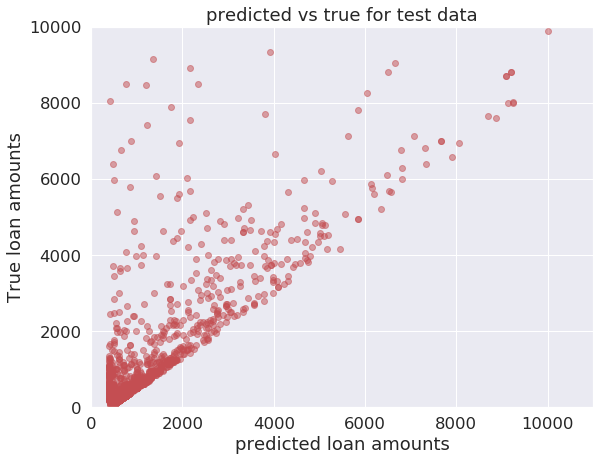

In [9]:
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test, y_test, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted loan amounts')
plt.ylabel('True loan amounts')
axes = plt.gca()
axes.set_xlim([0,11000])
axes.set_ylim([0,10000])
plt.show();

Nuestro modelo parece estar constantemente subestimando los montos de los préstamos (la mayoría de los puntos parecen estar por encima de la línea y = x). Intentaremos mejorar este modelo mediante regresión multivariable.


**Antes de comenzar a buscar otras características explicativas, es importante tener en cuenta que la interpretación de los resultados anteriores solo es válida si no se violan los supuestos de la regresión lineal. Vamos a dejar pasar estas suposiciones por ahora ...**

<br>
<br> 
<br>

----